In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from math import pi
import numpy as np
import random

In [2]:
def bz(num_q, s):
    qc = QuantumCircuit(num_q + 1)
    qc.barrier()

    for i in range(0, num_q):
        if (2 ** i) & s != 0:
            qc.cx(i, num_q)

    qc.barrier()

    return qc

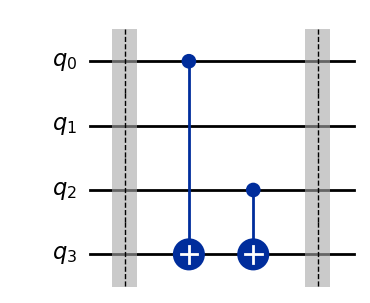

In [3]:
display(bz(3, 5).draw(output="mpl"))

In [4]:
def compile_circuit(query_function):
    num_q = query_function.num_qubits - 1
    
    qc = QuantumCircuit(QuantumRegister(num_q + 1, "q"), ClassicalRegister(num_q, "a"))
    
    qc.x(num_q)
    # create first superposistion and minus state
    qc.h(range(0, num_q + 1))
    
    qc = qc.compose(query_function)

    qc.h(range(0, num_q + 1))

    qc.measure(range(0, num_q), range(0, num_q))
    return qc

In [5]:
def do_bz(num_q, s):
    return compile_circuit(bz(num_q, s))

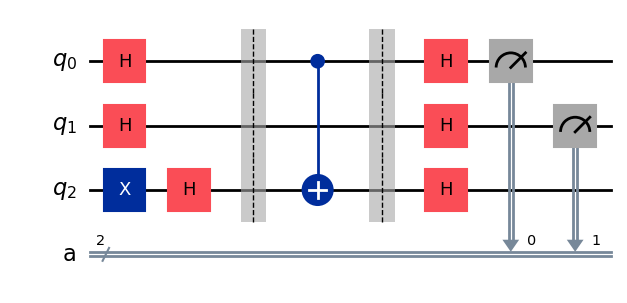

In [6]:
display(do_bz(2, 1).draw(output="mpl"))

Measured 00100 with frequency 1024


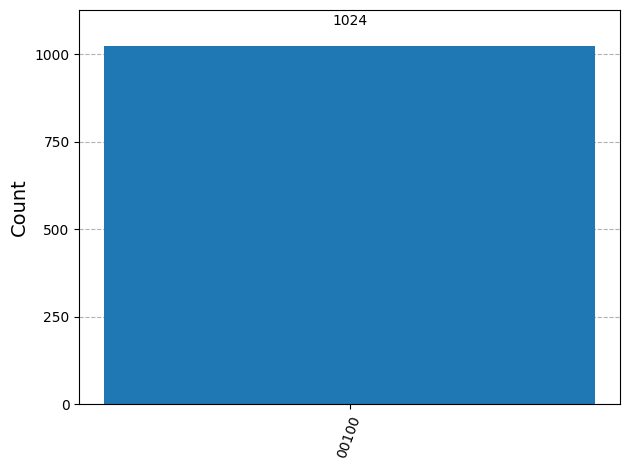

In [10]:
result = AerSimulator().run(do_bz(5, 4)).result()
statistics = result.get_counts()
 
for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")
 
display(plot_histogram(statistics))